<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/embedding/GIN_embedding_test_M5_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print('cuda: ', torch.cuda.is_available())

2.1.0+cu121
cuda:  True


In [ ]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install umap-learn -- quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

In [1]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [2]:
from scripts.func_utils import make_path, convert_with_qed_sa, get_min, \
                                plot_loss, plot_performance

from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
import yaml
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
from scripts.CONSTANT import *
from scripts.yaml_utils import *
from scripts.TRAIN import *
print('VOCAB TYPE:', VOCAB_TYPE)

VOCAB TYPE: smiles


In [3]:
clean_files()

removed from /content/drive/MyDrive/ADMET/: gin_supervised_contextpred_pre_trained.pth 


In [ ]:
from IPython.display import Code

Code(filename='scripts/model_architecture.py', language='python')

## comparison between ST and MT

In [12]:
folder_name = 'M5/uw_no'
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    perfs = []

    for i in range(3):
        file_name = f'{folder_name}/{model_type}_MT_{i}.yml'
        p = yml_report(file_name)
        perfs.append(p)

    for name in names_M5:
        perfs_ST = []
        for j in range(3):
            file_name = f'ST/{name}/{model_type}_ST_{j}.yml'
            p = yml_report(file_name)
            perfs_ST.append(p)
        print('#'*35, model_type, '#'*35)
        print('*'*20, 'ST', '*'*20)
        eval_perf_list(perfs_ST, name, {'cls': [0,1,6,8], 'reg':[0,2,3]})
        print('*'*20, 'MT', '*'*20)
        eval_perf_list(perfs, name, {'cls': [0,1,6,8], 'reg':[0,2,3]})
        print('\n\n')

################################### MLP ###################################
******************** ST ********************
repeated num # 3 idx 2 has the lowest loss
******************** CYP2C19_Veith ******************** 
	|       acc      |       w_acc      |       auc      |       ap      
	&0.780$\pm$0.004  &0.780$\pm$0.004  &0.853$\pm$0.003  &0.806$\pm$0.004  
 idx 2: &0.785            &0.784            &0.854            &0.805            

******************** MT ********************
repeated num # 3 idx 2 has the lowest loss
******************** CYP2C19_Veith ******************** 
	|       acc      |       w_acc      |       auc      |       ap      
	&0.801$\pm$0.004  &0.800$\pm$0.003  &0.871$\pm$0.006  &0.839$\pm$0.012  
 idx 2: &0.807            &0.805            &0.879            &0.856            




################################### MLP ###################################
******************** ST ********************
repeated num # 3 idx 1 has the lowest loss
*************

### Check MT-GIN model

In [ ]:
Code('scripts/model_architecture.py')

In [42]:
# file_name = f'{folder_name}/{model_type}_MT_{i}.yml'
file_name = 'M5/uw_no/GIN_MT_1.yml'
names = names_M5
import yaml
with open(file_name, 'r') as f: data = yaml.safe_load(f)
config = data['config']
models = PRED(**config)
trn, val, tst = collect_data(names)
trn_l, val_l, tst_l, vocab = get_multi_loader(trn, val, tst, config)

gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:00<00:00, 74.5MB/s]
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...


Pretrained model loaded
Model type:  GIN | Model parameters:  1978801
collect data for:  ['CYP2C19_Veith', 'CYP2D6_Veith', 'CYP3A4_Veith', 'CYP1A2_Veith', 'CYP2C9_Veith']


Done!


---> loader for ['CYP2C19_Veith', 'CYP2D6_Veith', 'CYP3A4_Veith', 'CYP1A2_Veith', 'CYP2C9_Veith']
--> preparing data loader for model type  GIN
--> preparing data loader for model type  GIN
--> preparing data loader for model type  GIN


# calculate embedding from MT-GIN

In [43]:
config

{'IS_R': [False, False, False, False, False],
 'MAX_EPOCH': 600,
 'batch_size': 128,
 'config_path': 'M5/uw_no/GIN_MT_1.yml',
 'dropout': 0.1,
 'hid_dims': [128, 64, 32, 16],
 'in_dim': 256,
 'lr': 0.0001,
 'model_path': 'M5/uw_no/GIN_MT_1.pt',
 'model_type': 'GIN',
 'out_dim': 5,
 'patience': 30,
 'pretrain_model': 'gin_supervised_contextpred',
 'prop_names': ['CYP2C19_Veith',
  'CYP2D6_Veith',
  'CYP3A4_Veith',
  'CYP1A2_Veith',
  'CYP2C9_Veith'],
 'scale_dict': None,
 'uncertainty_weight': False,
 'verbose_freq': 100,
 'wd': 1e-05,
 'weight_loss': [0.2, 0.2, 0.2, 0.2, 0.2]}

In [44]:
from tqdm import tqdm
models.model.eval()
embs = None
mu_dict = {}
y_label = {}
# tqdm(enumerate(tst_l), total=len(tst_l), desc='Cal Emb')
for idx, batch_data in tqdm(enumerate(tst_l), total=len(tst_l), desc='Cal Emb'):
    fp, labels = batch_data
    # labels = labels.to(config)
    # print(labels.shape)
    mu = models.model(fp.to('cuda'), return_emb=True)
    # print('emb shape', emb.shape)
    labels = labels.to('cuda')
    mask = labels == MASK
    for j, (name, is_r) in enumerate(zip(config['prop_names'], config['IS_R'])):
        mask_here = mask[:,j]
        label = labels[:,j][~mask_here]
        # mask_here = mask_here.reshape(mask_here.shape[0],1).expand_as(mu)
        # mu_ = mu * (~mask_here)
        unmask_indices = torch.nonzero(1-mask_here.float().squeeze(),
                                       as_tuple=False).squeeze()
        mu_ = mu[unmask_indices]
        # print(label.shape, mu_.embs.shape[0]shape)
        if label.shape[0] != mu_.shape[0]:
            print(label.shape, mu_.shape, 'different! ')
            mu_ = mu_.reshape(label.shape[0], mu_.shape[0])
        # break
    # break
    #     break
    # break

        del mask_here
        label = label.cpu().detach().numpy().tolist()
        mu_ = mu_.cpu().detach().numpy()
        # print(mu_.shape)
        if idx == 0:
            mu_dict[name] = mu_
            y_label[name] = label
        else:
            mu_dict[name] = np.append(mu_dict[name], mu_.copy(), axis=0).copy()
            y_label[name] += label
        assert len(y_label[name]) == mu_dict[name].shape[0]
        # print(len(y_label[name]), mu_dict[name].shape)
    #     break
    # break

#     # print(emb, emb.shape)
#     emb = emb.cpu().detach().numpy()

#     if idx == 0: embs = emb.copy()
#     else: embs = np.concatenate((embs, emb), axis=0).copy()
#     # print(embs.shape)
#     # if idx == 3: break
#     # embs += emb
#     # break
# assert len(tst_l.dataset) ==

Cal Emb: 100%|██████████| 73/73 [00:20<00:00,  3.53it/s]


In [ ]:
from IPython.display import Code
Code(
'scripts/eval_utils.py'
)

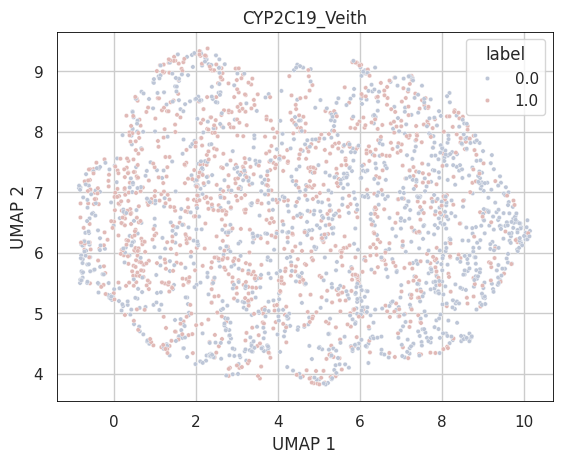

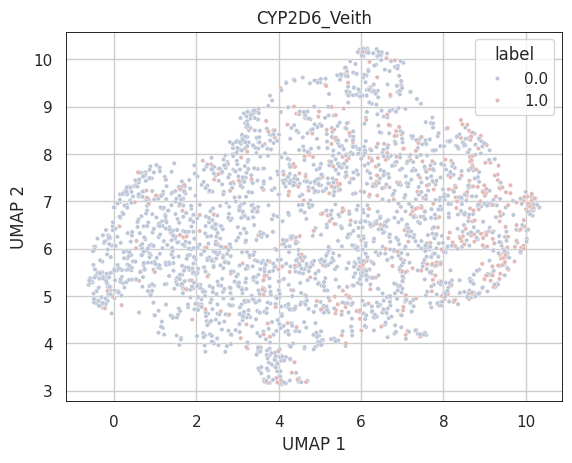

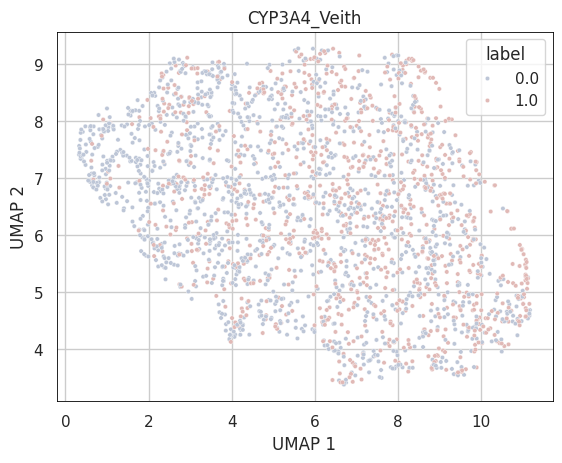

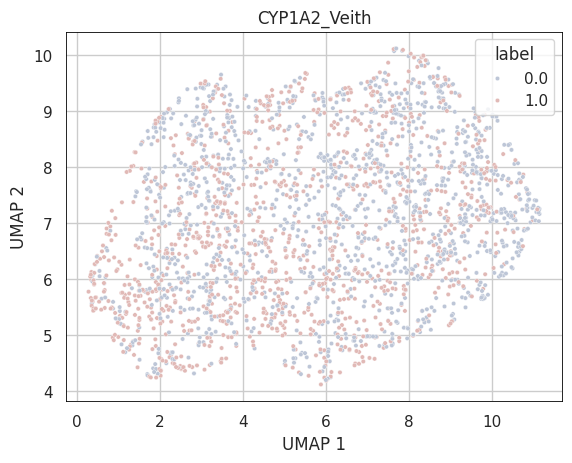

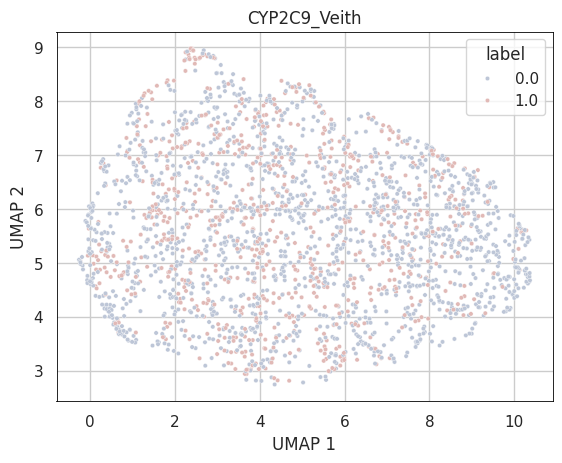

SyntaxError: 'break' outside loop (<ipython-input-61-00976b24967c>, line 6)

In [61]:
for name in names:
    plot_dim_reduced(mu_dict[name], np.array(y_label[name]), names_dict[name], dim_reduct='UMAP', title=f'{name}',
                     cp=None
)

break

In [50]:


def plot_dim_reduced(mol_info, label, task_type, dim_reduct='PCA',
                     title=None, savepath=None, savename=None, ver=False,
                     plot_show=True, cp=None):
    """
    param mol_info: could be MACCS Fingerprint
    param label: label of data
    param task_type: [True, False], True:regression; False: classification
    param dim_reduct" : ['PCA', 't-SNE', 'UMAP']
    param title: None or string, the name of the plot
    Return figure.png saved at dim_reduct/title.png
    """
    import umap

    features, labels = mol_info.copy(), label.copy()
    n_components = 2
    if dim_reduct == 'PCA':
        pca = PCA(n_components=n_components)
        pca.fit(features)
        features = StandardScaler().fit_transform(features)
        features = pd.DataFrame(data=pca.transform(features))
        ax_label = 'principle component'
    elif dim_reduct == 't-SNE':
        features = TSNE(n_components=n_components).fit_transform(features)
        features = MinMaxScaler().fit_transform(features)
        features = pd.DataFrame(np.transpose((features[:,0],features[:,1])))
        ax_label = 't-SNE'
    elif dim_reduct == 'UMAP':
        umap_reducer = umap.UMAP(n_components=n_components)
        features = umap_reducer.fit_transform(features)
        features = pd.DataFrame(np.transpose((features[:,0],features[:,1])))
        ax_label = 'UMAP'
    else:
        print("""Error! dim_reduct should be 'PCA', 't-SNE', or 'UMAP'""")
        return

    columns = [f'{ax_label} {i+1}' for i in range(n_components)]
    features.columns = columns
    features['label'] = labels

    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots()

    if task_type == False:
        # palette_type = 'vlag'
        if cp == None: palette_type = 'vlag'
        else: palette_type = cp
    else:
        palette_type = 'RdBu'
    param_dict = {'x': columns[0],
                  'y': columns[1],
                  'hue': 'label',
                  'palette': palette_type,
                  'data': features,
                  's': 10,
                  'ax': ax}

    sns.scatterplot(**param_dict)

    if task_type == True:
        norm = plt.Normalize(labels.min(), labels.max())
        scalarmap = plt.cm.ScalarMappable(cmap=param_dict['palette'], norm=norm)
        scalarmap.set_array([])
        ax.figure.colorbar(scalarmap)
        ax.get_legend().remove()
    else:
        sns.move_legend(ax, 'upper right')

    ax = plt.gca()
    border_color = 'black'
    border_width = 0.6

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_visible(True)

    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color(border_color)

    if title == None:
        title = f'{dim_reduct}_demo'
    plt.title(title)
    if savepath != None:
        make_path(savepath, False)
        if savename == None:
            savename = f'{savepath}/{title}.png'
        else:
            savename = savepath + '/' + savename
        plt.savefig(savename, format='png', transparent=False)
        if ver:
            print(f'figure saved at {savename}')
    if plot_show:
        plt.show()
    plt.close()

(2533, 16)


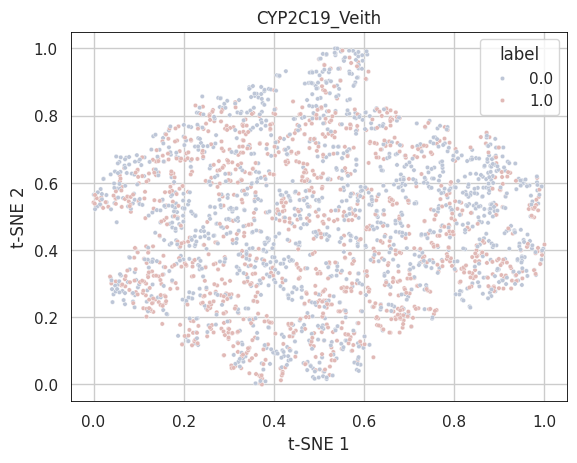

(2626, 16)


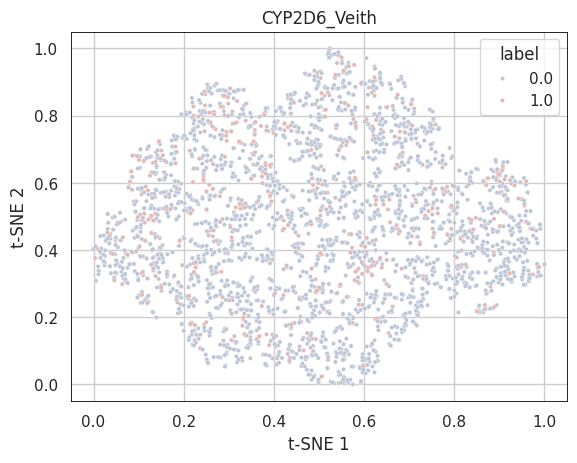

(2466, 16)


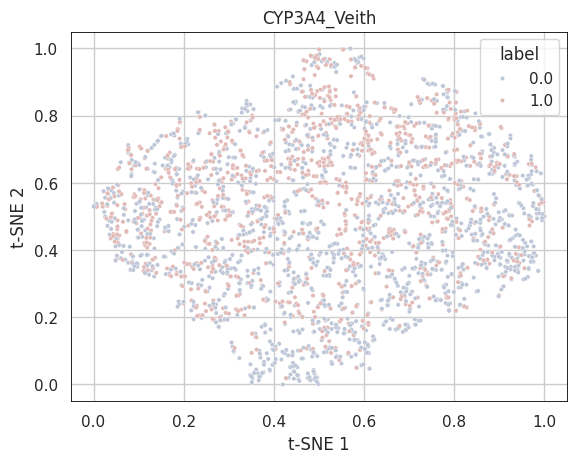

(2516, 16)


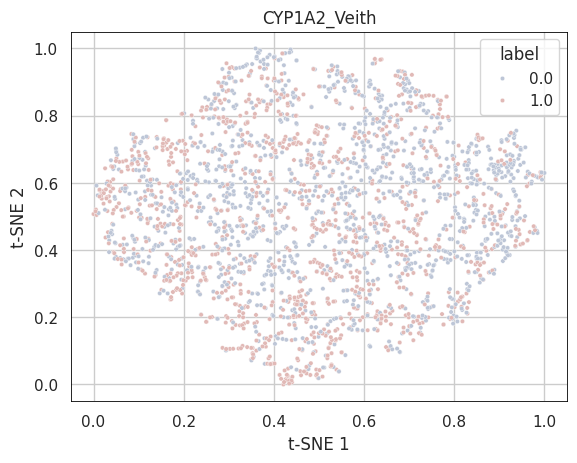

(2418, 16)


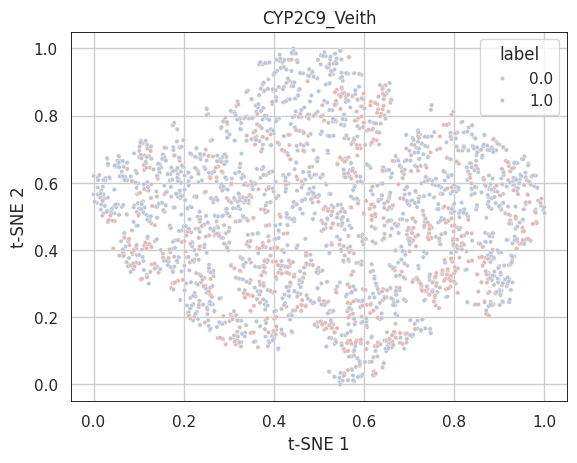

In [61]:
# tst_df = tst.fillna(-100)
# name = names_M5[0]
# tst_df[name].tolist()[-1]
# for name in names_M5:
#     label_all = tst_df[name].tolist()
#     unmask_inds = []; label = []
#     for idx in range(len(embs)):
#         if label_all[idx] != MASK:
#             unmask_inds.append(idx); label.append(label_all[idx])
#     features = embs[unmask_inds, :]
#     print(features.shape)
#     plot_dim_reduced(features, label, names_dict[name], dim_reduct='t-SNE', title=f'{name}')

In [38]:
import umap

In [52]:
embs[[0,2,3], :].shape

(3, 16)

In [ ]:
Code('scripts/train.py')